# Easy visualization of seismic lines

In [25]:
import matplotlib.pyplot as plt
import segyio
import numpy as np


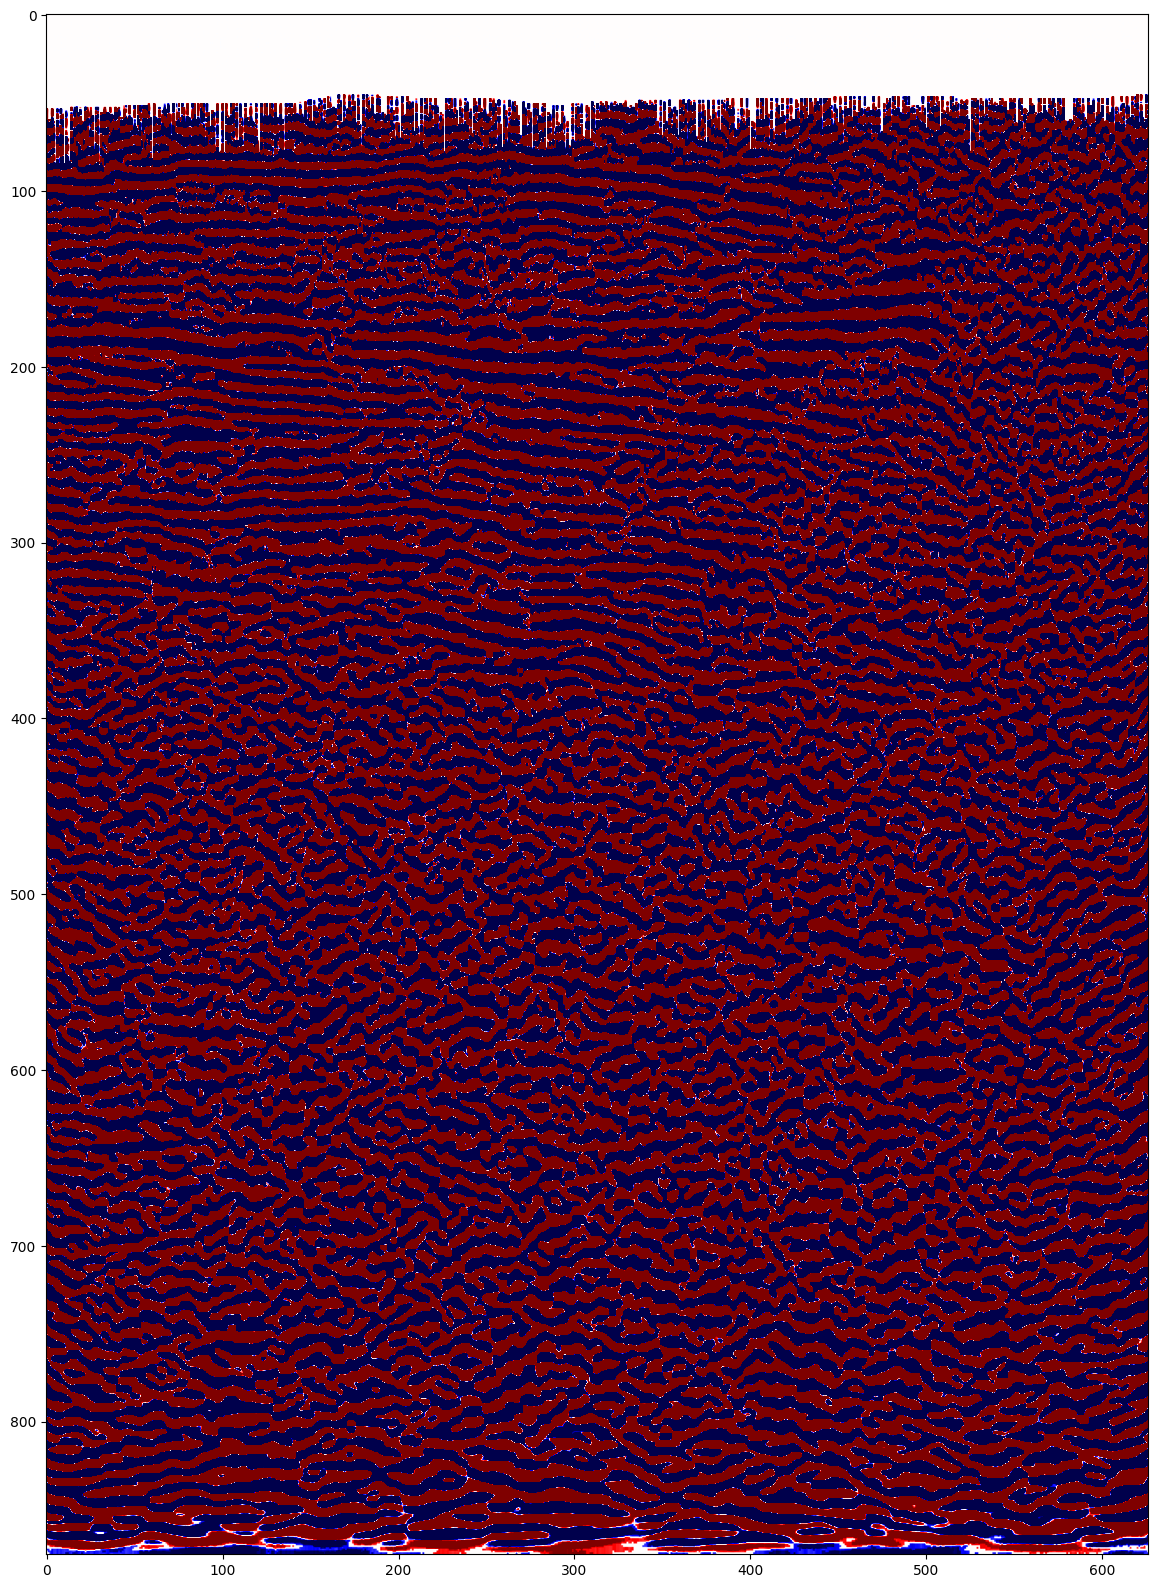

In [26]:
segyfile = '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/Data/2D Seismic/Longcarica 1/LO-5V-82_01._KNGD export.sgy'

f = segyio.open(segyfile, ignore_geometry=True)

clip = 1e+2
vmin, vmax = -clip, clip

# Figure
figsize=(20, 20)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k',
                       squeeze=False,
                       sharex=True)
axs = axs.ravel()
im = axs[0].imshow(f.trace.raw[:].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

f.close()

# Extracting Features

In [45]:
# Open seismic file
with segyio.open(segyfile, "r", ignore_geometry=True) as f:
    # Access traces as a numpy array
    traces = segyio.tools.collect(f.trace.raw[:])  # All traces
    depths = np.arange(traces.shape[1])  # Depth levels

# Compute amplitude attributes
avg_amplitude = np.mean(np.abs(traces), axis=0)  # Mean absolute amplitude per depth
max_amplitude = np.max(np.abs(traces), axis=0)   # Max amplitude per depth


In [46]:
from scipy.fftpack import fft

fft_spectrum = fft(traces, axis=1)
power_spectrum = np.abs(fft_spectrum)**2
dominant_frequency = np.argmax(power_spectrum, axis=1)  # Dominant frequency per trace


In [47]:
print("Depth length:", len(depths))
print("AvgAmplitude length:", len(avg_amplitude))
print("MaxAmplitude length:", len(max_amplitude))
print("DominantFrequency length:", len(dominant_frequency))

lengths = [
    len(depths),
    len(avg_amplitude),
    len(max_amplitude),
    len(dominant_frequency)
]

max_length = max(lengths)


def pad_with_nan(array, max_length):
    array = np.asarray(array, dtype=float)  # Convert to float for NaN
    return np.pad(array, (0, max_length - len(array)), constant_values=np.nan)

dominant_frequency = pad_with_nan(dominant_frequency,max_length)

Depth length: 876
AvgAmplitude length: 876
MaxAmplitude length: 876
DominantFrequency length: 627


In [ ]:
# # Extra possible features: 
# from skimage.feature import graycomatrix, graycoprops

# # Normalize traces for texture computation
# normalized_traces = (traces - np.min(traces)) / (np.max(traces) - np.min(traces))
# normalized_traces = (normalized_traces * 255).astype(np.uint8)

# # Example: GLCM calculation
# glcm = graycomatrix(normalized_traces.T, distances=[1], angles=[0], symmetric=True, normed=True)
# contrast = graycoprops(glcm, 'contrast')[0, 0]
# entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))

# from scipy.signal import hilbert

# # Hilbert transform to calculate envelope and phase
# analytic_signal = hilbert(traces, axis=1)
# amplitude_envelope = np.abs(analytic_signal)  # Instantaneous amplitude
# instantaneous_phase = np.angle(analytic_signal)  # Instantaneous phase
# instantaneous_frequency = np.diff(np.unwrap(instantaneous_phase), axis=1)  # Frequency



In [49]:
import pandas as pd

features = pd.DataFrame({
    "Depth": depths,
    "AvgAmplitude": avg_amplitude,
    "MaxAmplitude": max_amplitude,
    "Dominant Frequency": dominant_frequency
})

# Save to a CSV
features.to_csv("seismic_features.csv", index=False)
